In [78]:
# Importazione delle librerie essenziali
import pandas as pd  # Gestione dei dati con DataFrame
import numpy as np

# Librerie per la visualizzazione dei dati
import plotly.graph_objects as go  # Visualizzazioni interattive avanzate
import plotly.subplots as sp  # Creazione di subplots interattivi
import seaborn as sns  # Grafici statistici
import matplotlib.pyplot as plt  # Grafici statici

# Librerie aggiuntive per l'analisi e la formattazione dei dati
import numpy as np  # Operazioni numeriche
import scipy.interpolate as spi  # Interpolazione e smoothing delle curve
import matplotlib.ticker as mtick  # Formattazione degli assi


# Importazione delle librerie necessarie
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configurazione per visualizzare tutte le colonne nei DataFrame
pd.set_option('display.max_columns', None)

In [79]:
# List of CSV filenames
lista_nomi = ["inf_comunali.csv", "inf_cronologia_edifici.csv", "inf_età.csv", "inf_famiglie.csv",  
              "inf_interni.csv", "inf_numero_di_piani.csv", "inf_parrocchie.csv", "inf_provinciali.csv",  
              "inf_redditi_01.csv", "inf_redditi_02.csv", "inf_redditi_03.csv", "inf_regioni.csv",  
              "inf_scolarizzazione.csv", "inf_scuole.csv", "inf_settori.csv", "inf_stranieri.csv",  
              "informazioni_geografiche.csv", "Errori.csv"]

# Dictionary to hold DataFrames
dfs = {}

# Loop to load each CSV file
for df_name in lista_nomi:
    try:
        # Load the CSV into a DataFrame and clean the name for the dictionary key
        df_key = str(df_name).replace("inf_", "").replace(".csv", "")
        dfs[df_key] = pd.read_csv(f'data cleaning/{df_name}')
    except FileNotFoundError:
        print(f"File {df_name} not found. Skipping.")
    except pd.errors.EmptyDataError:
        print(f"File {df_name} is empty. Skipping.")
    except Exception as e:
        print(f"Error processing {df_name}: {e}")

# Check the dictionary
print(dfs.keys())

File informazioni_geografiche.csv not found. Skipping.
File Errori.csv not found. Skipping.
dict_keys(['comunali', 'cronologia_edifici', 'età', 'famiglie', 'interni', 'numero_di_piani', 'parrocchie', 'provinciali', 'redditi_01', 'redditi_02', 'redditi_03', 'regioni', 'scolarizzazione', 'scuole', 'settori', 'stranieri'])


In [80]:
def grafico_barre(df_plot, colonna_x, colonna_y, titolo, figsize=(12, 7), mostra_media=False, descrizione=None, orientazione='vertical'):
    # Stile di seaborn
    sns.set_style("whitegrid")
    
    # Crea la figura con la dimensione specificata
    plt.figure(figsize=figsize)
    
    # Imposta l'orientazione del grafico
    if orientazione == 'vertical':
        ax = sns.barplot(x=colonna_x, y=colonna_y, data=df_plot, color='#3498db', edgecolor='black')
        plt.xticks(rotation=45, ha='right', fontsize=12)
        for index, value in enumerate(df_plot[colonna_y]):
            ax.text(index, value + 0.5, str(value), ha='center', fontsize=12, fontweight='bold')
        plt.xlabel(colonna_x, fontsize=14)
        plt.ylabel(f'{colonna_y} Media', fontsize=14)
    else:
        ax = sns.barplot(y=colonna_x, x=colonna_y, data=df_plot, color='#3498db', edgecolor='black')
        plt.yticks(fontsize=12)
        for index, value in enumerate(df_plot[colonna_y]):
            ax.text(value + 0.5, index, str(value), va='center', fontsize=12, fontweight='bold')
        plt.ylabel(colonna_x, fontsize=14)
        plt.xlabel(f'{colonna_y} Media', fontsize=14)
    
    # Aggiunge una linea tratteggiata per la media se richiesto
    if mostra_media:
        media_valore = df_plot[colonna_y].mean()
        if orientazione == 'vertical':
            plt.axhline(media_valore, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media_valore:.2f}')
        else:
            plt.axvline(media_valore, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media_valore:.2f}')
        plt.legend(fontsize=12)
    
    # Migliora il design
    plt.title(titolo, fontsize=16, fontweight='bold')
    plt.grid(axis='y' if orientazione == 'vertical' else 'x', linestyle='--', alpha=0.7)
    
    # Aggiunge la descrizione sotto il grafico se presente
    if descrizione:
        plt.figtext(0.5, -0.1, descrizione, wrap=True, horizontalalignment='center', fontsize=10, color='dimgray')
    
    # Mostra il grafico
    plt.show()

## Quantità di Comuni per Regione, Provincia e Zona

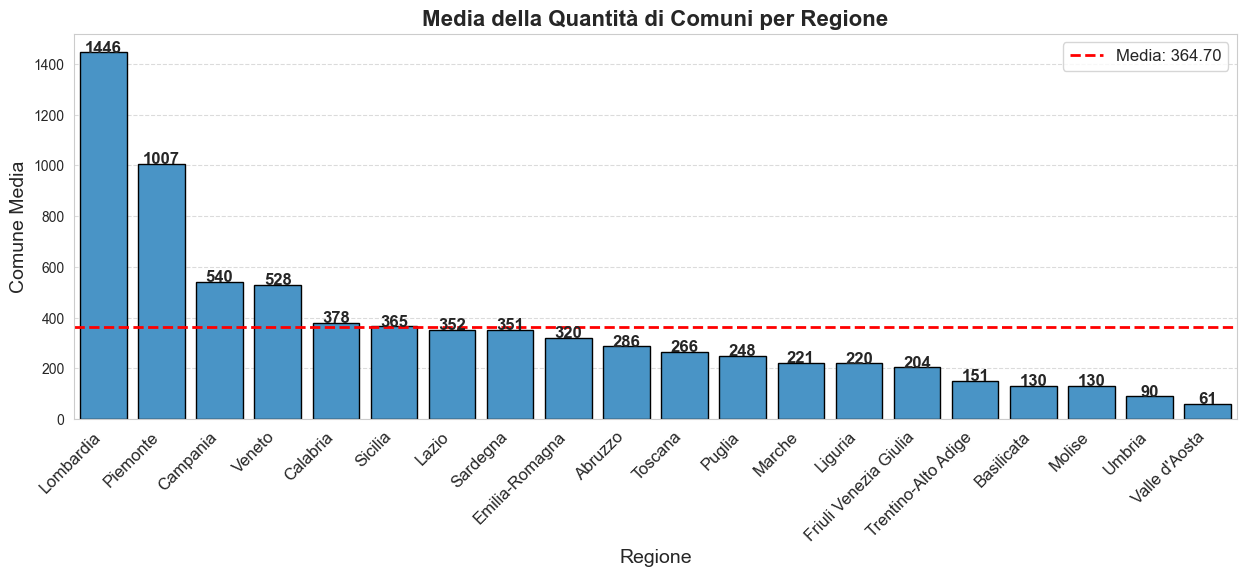

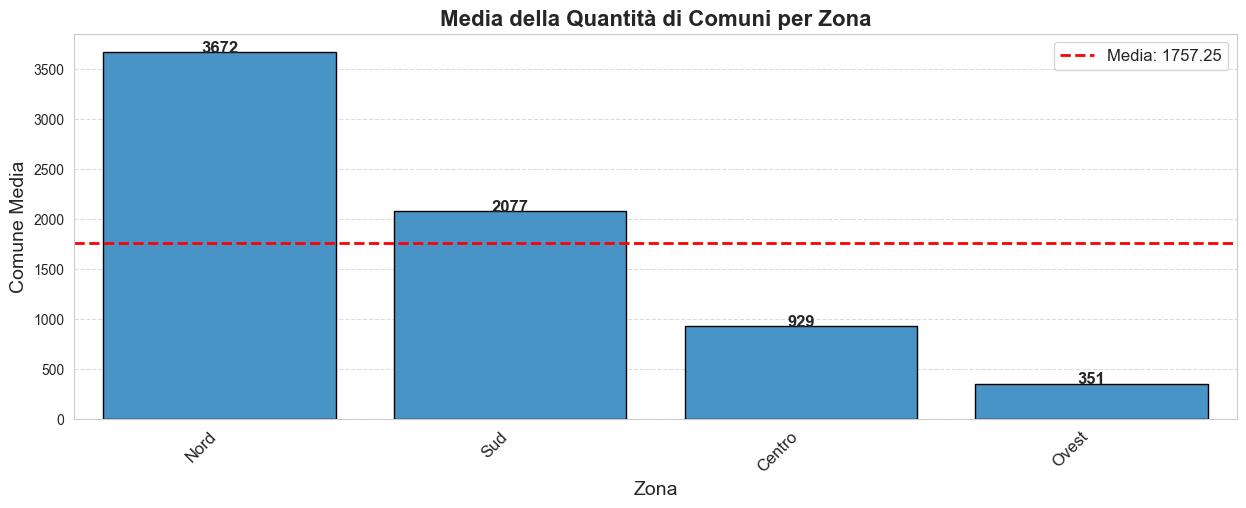

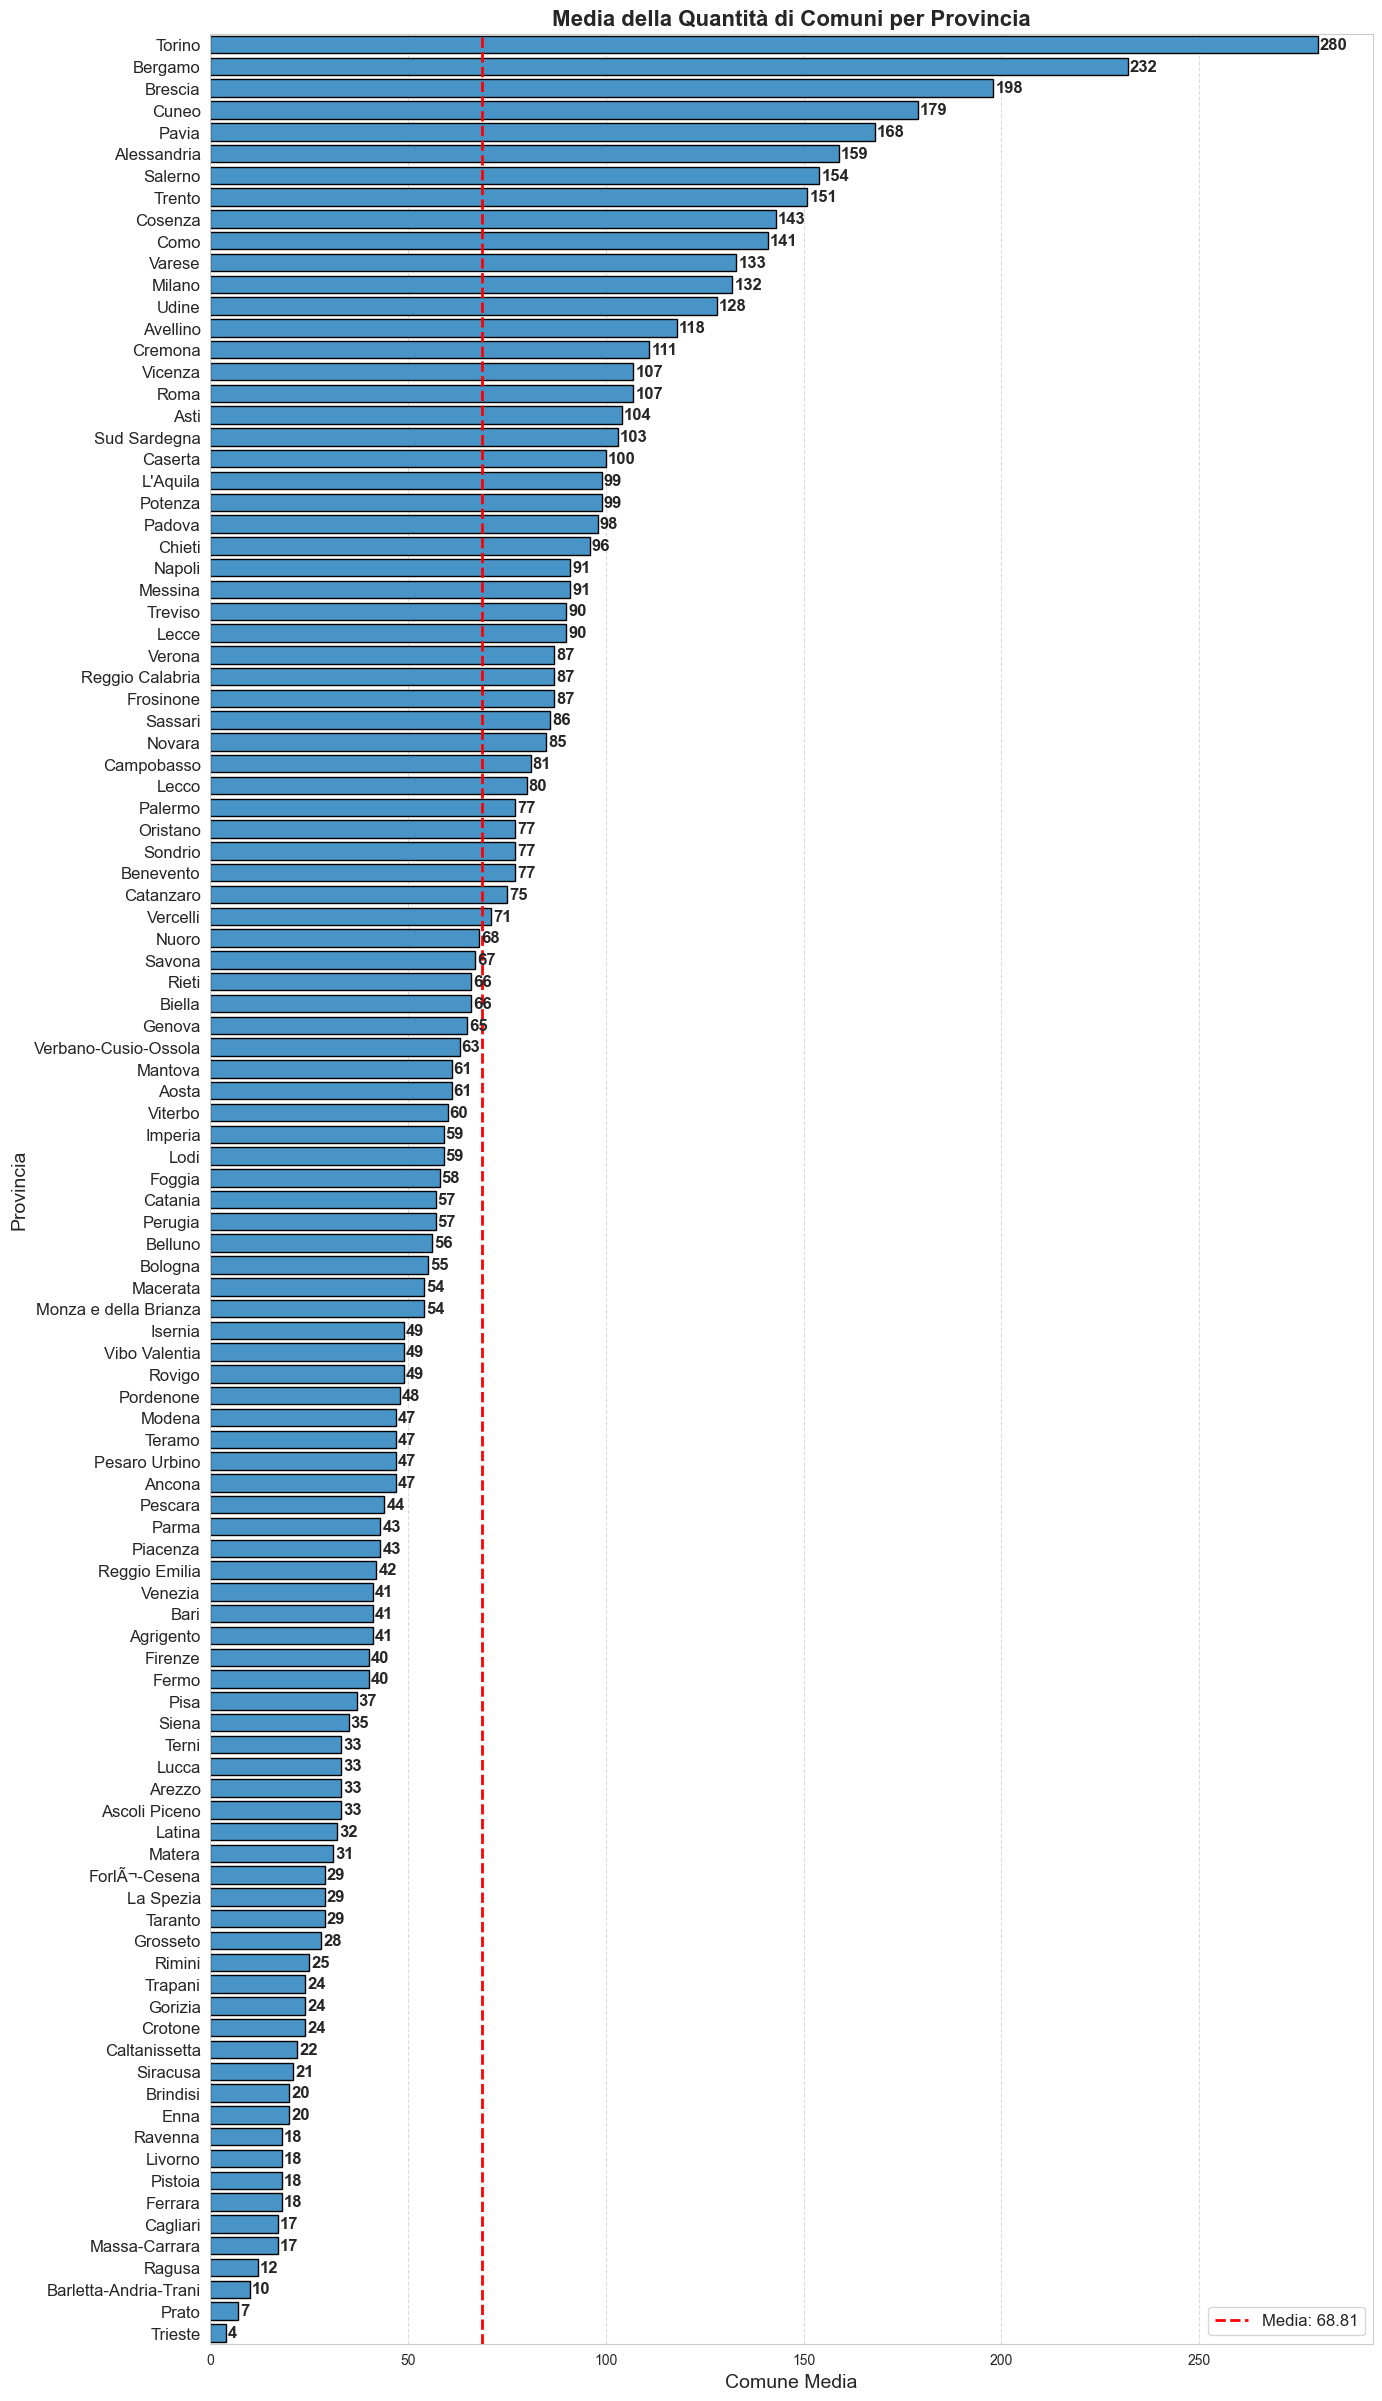

In [81]:
df_comuni = dfs['comunali'][['Comune', 'Regione', 'Provincia', 'Zona']]

def conta_comuni(df, gruppo):
    return df.groupby(gruppo)['Comune'].count().sort_values(ascending=False).reset_index()

grafico_barre(conta_comuni(df_comuni, 'Regione'), 'Regione', 'Comune', 
              'Media della Quantità di Comuni per Regione', figsize=(15, 5), mostra_media=True)

grafico_barre(conta_comuni(df_comuni[df_comuni['Zona'] != "Sconosciuto"], 'Zona'), 'Zona', 'Comune', 
              'Media della Quantità di Comuni per Zona', figsize=(15, 5), mostra_media=True)

grafico_barre(conta_comuni(df_comuni, 'Provincia'), 'Provincia', 'Comune', 
              'Media della Quantità di Comuni per Provincia', figsize=(15, 30), mostra_media=True, orientazione='horizontal')

## Fasce di Età della Popolazione nei Comuni Italiani

In [82]:
eta = dfs['età'][['0-4_Totale', '5-9_Totale', '10-14_Totale', '15-19_Totale', '20-24_Totale', 
                  '25-29_Totale', '30-34_Totale', '35-39_Totale', '40-44_Totale', '45-49_Totale', 
                  '50-54_Totale', '55-59_Totale', '60-64_Totale', '65-69_Totale', '70-74_Totale', 
                  '>74_Totale', 'Comune']]

eta = pd.merge(eta, dfs['comunali'][['Comune', 'Provincia', 'Regione', 'Zona']], on='Comune')
eta = pd.DataFrame(eta)

eta.head()#.to_clipboard()

,0-4_Totale,5-9_Totale,10-14_Totale,15-19_Totale,20-24_Totale,25-29_Totale,30-34_Totale,35-39_Totale,40-44_Totale,45-49_Totale,50-54_Totale,55-59_Totale,60-64_Totale,65-69_Totale,70-74_Totale,>74_Totale,Comune,Provincia,Regione,Zona
0,1306,1304,1620,1933,2141,1952,1947,2140,2324,2559,2389,2140,2138,1541,1652,3428,Agrigento,Agrigento,Sicilia,Sud
1,2697,2468,2419,2594,2698,3124,3694,4660,5087,5128,4659,4193,4319,3893,4029,8516,Alessandria,Alessandria,Piemonte,Nord
2,3871,3748,3798,3863,4070,4635,5386,6502,6927,6827,6169,5944,5701,5165,5227,12161,Ancona,Ancona,Marche,Centro
3,1383,1316,1296,1322,1476,1597,1739,2168,2533,2507,2295,2097,2242,1954,2053,4317,Aosta,Aosta,Valle d'Aosta,Sconosciuto
4,3284,3183,3140,3193,3720,4220,4775,5644,5943,6050,5257,4722,5081,4308,4479,9347,Arezzo,Arezzo,Toscana,Centro


In [83]:
def grafico_distribuzione_eta(df_plot, titolo, figsize=(12, 7), mostra_media=False, descrizione=None):
    # Stile di seaborn con griglia bianca
    sns.set_style("whitegrid")

    # Somma dei valori per ciascun intervallo di età
    eta_totale = df_plot[['0-4_Totale', '5-9_Totale', '10-14_Totale', '15-19_Totale', '20-24_Totale', 
                          '25-29_Totale', '30-34_Totale', '35-39_Totale', '40-44_Totale', '45-49_Totale', 
                          '50-54_Totale', '55-59_Totale', '60-64_Totale', '65-69_Totale', '70-74_Totale', 
                          '>74_Totale']].sum()

    # Creazione di un DataFrame per la visualizzazione
    eta_df = eta_totale.reset_index()
    eta_df.columns = ['Età', 'Totale']

    # Modifica i nomi delle età rimuovendo "_Totale"
    eta_df['Età'] = eta_df['Età'].str.replace('_Totale', '').str.replace('>', '+')

    # Crea la figura con la dimensione specificata
    plt.figure(figsize=figsize)

    # Crea il grafico a barre con lo stesso colore (blu) e bordi neri
    ax = sns.barplot(
        x='Età', y='Totale', data=eta_df, color='#3498db', edgecolor='black'
    )

    # Ruota le etichette sull'asse X per una visibilità migliore (ora sono dritte)
    plt.xticks(rotation=0, ha='center', fontsize=12)

    # Aggiungi le etichette sopra ogni barra (con un offset maggiore per migliorare la visibilità)
    for index, value in enumerate(eta_df['Totale']):
        ax.text(index, value + 100, str(value), ha='center', fontsize=12, fontweight='bold')  # Aggiunto un offset di 50

    # Aggiunge una linea tratteggiata per la media se richiesto
    if mostra_media:
        media_valore = eta_df['Totale'].mean()
        plt.axhline(media_valore, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media_valore:.2f}')
        plt.legend(fontsize=12)

    # Migliora il design
    plt.xlabel('Intervallo di età', fontsize=14)
    plt.ylabel('Totale', fontsize=14)
    plt.title(titolo, fontsize=16, fontweight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Aggiunge la descrizione sotto il grafico se presente
    if descrizione:
        plt.figtext(0.5, -0.1, descrizione, wrap=True, horizontalalignment='center', fontsize=10, color='dimgray')

    # Mostra il grafico
    plt.show()

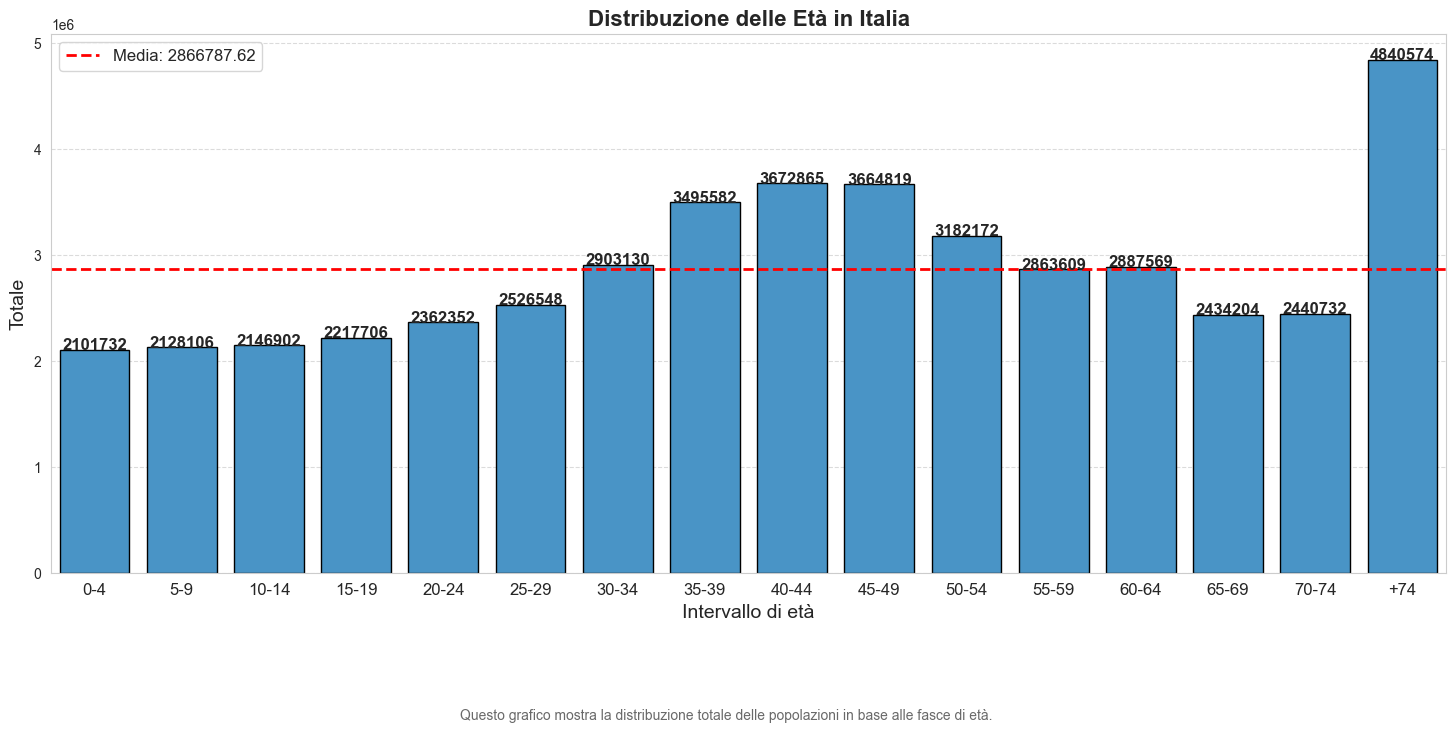

In [84]:
# Chiamata della funzione per generare il grafico
grafico_distribuzione_eta(
    eta, 
    titolo="Distribuzione delle Età in Italia", 
    mostra_media=True, 
    descrizione="Questo grafico mostra la distribuzione totale delle popolazioni in base alle fasce di età.",
    figsize=(18, 7)
)

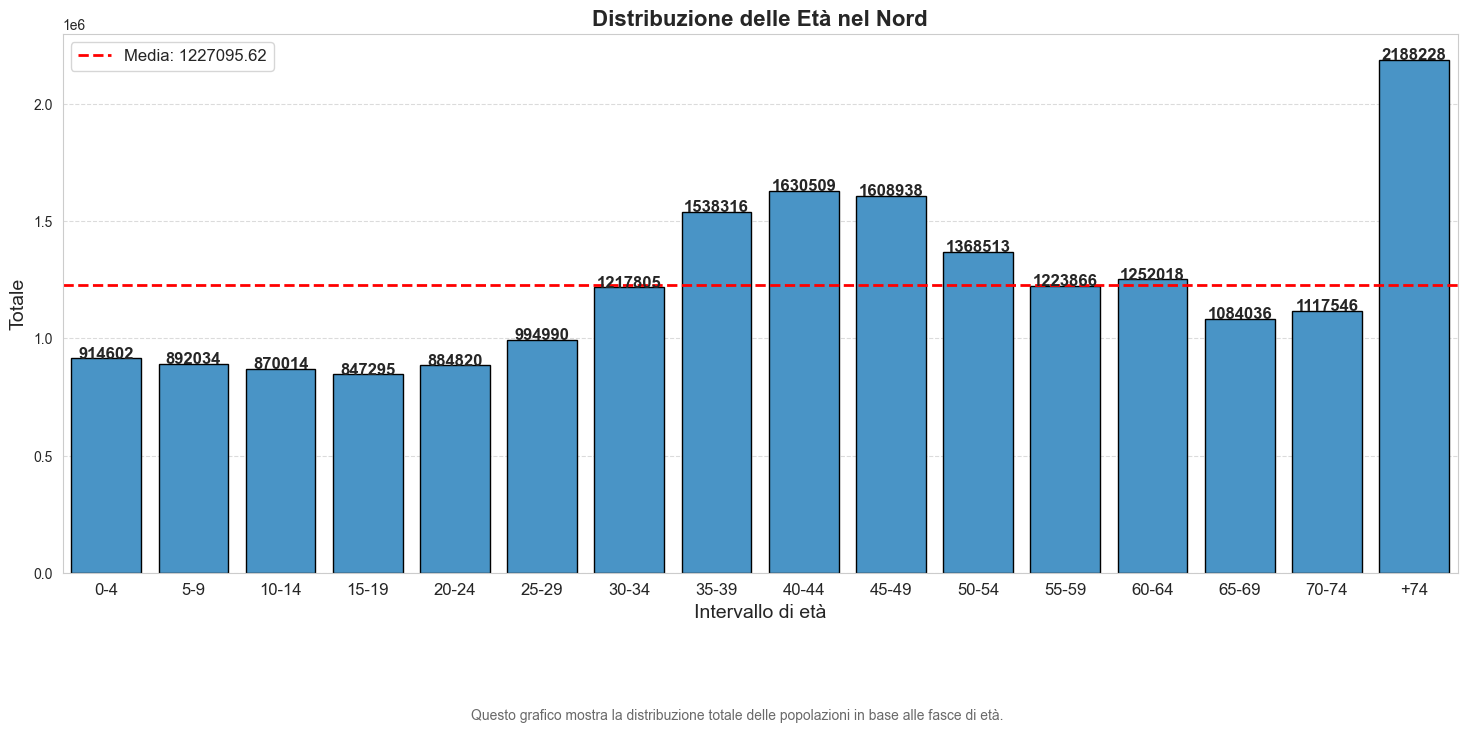

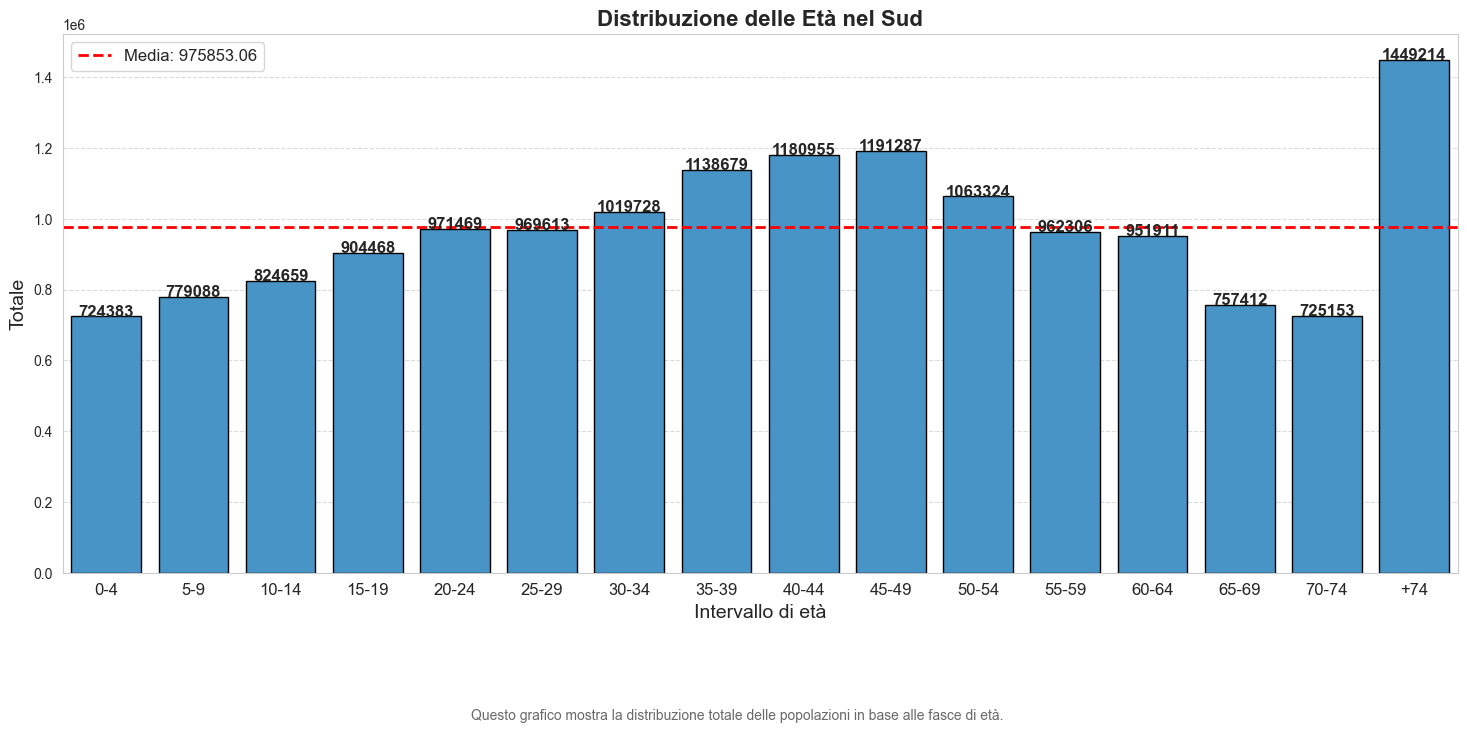

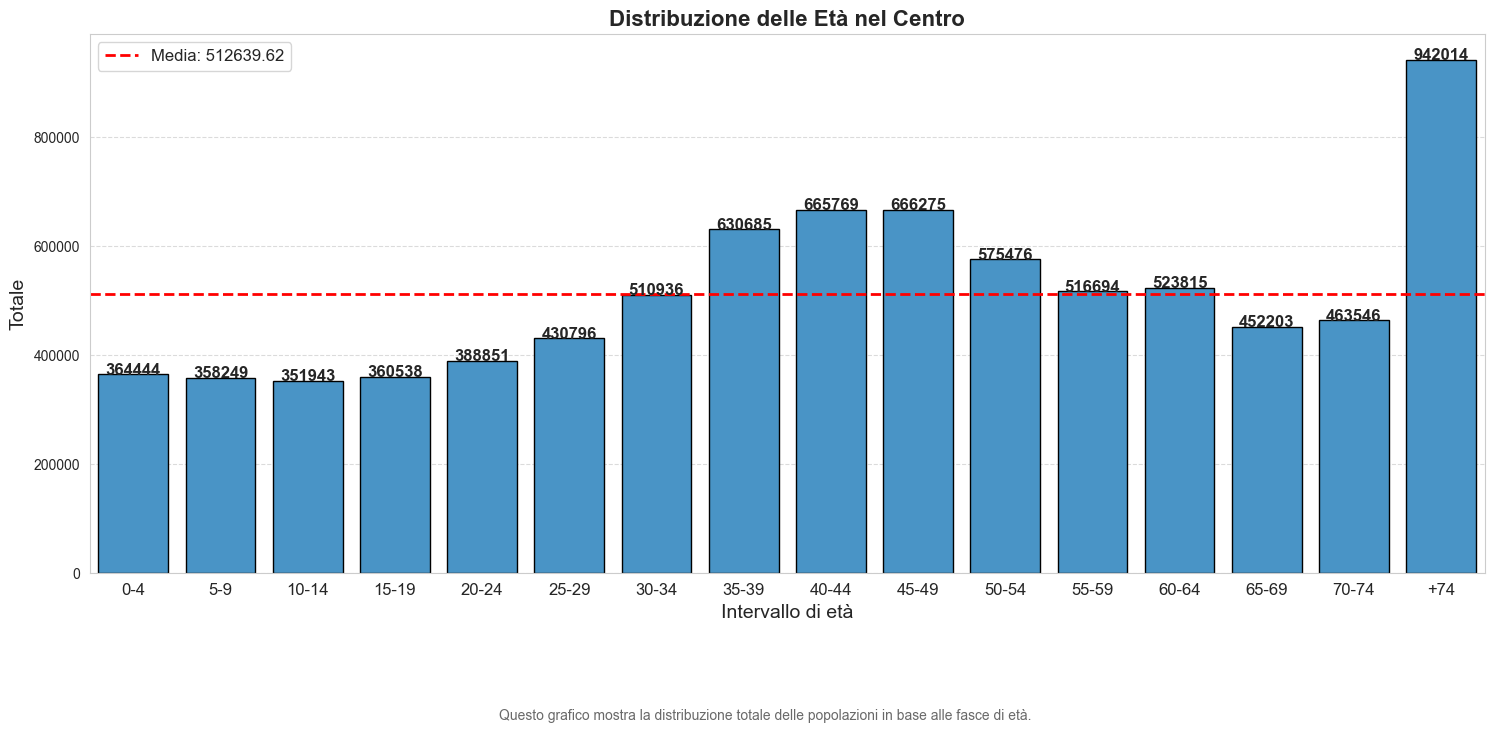

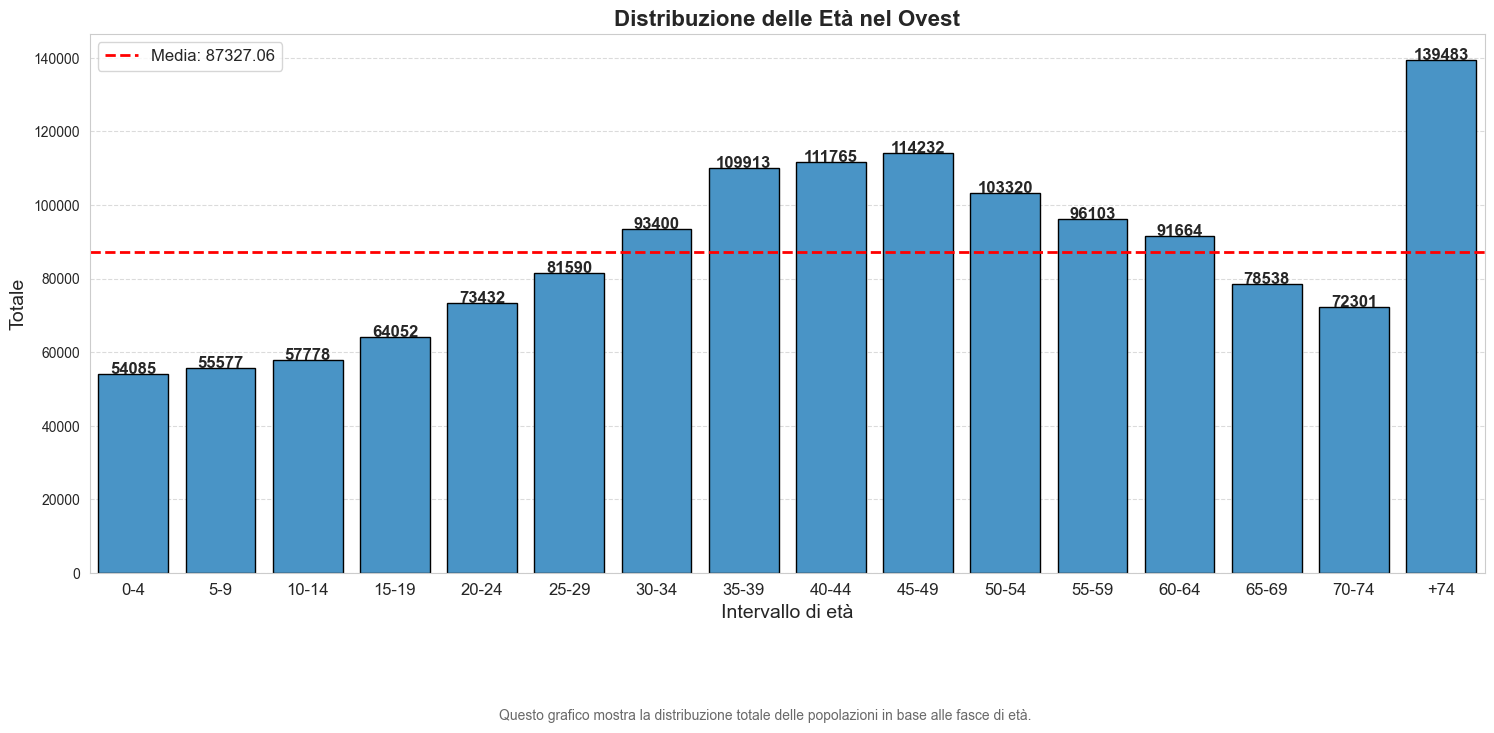

In [85]:
# Chiamata della funzione per generare il grafico
grafico_distribuzione_eta(
    eta[eta['Zona'] == 'Nord'], 
    titolo="Distribuzione delle Età nel Nord", 
    mostra_media=True, 
    descrizione="Questo grafico mostra la distribuzione totale delle popolazioni in base alle fasce di età.",
    figsize=(18, 7)
)

# Chiamata della funzione per generare il grafico
grafico_distribuzione_eta(
    eta[eta['Zona'] == 'Sud'], 
    titolo="Distribuzione delle Età nel Sud", 
    mostra_media=True, 
    descrizione="Questo grafico mostra la distribuzione totale delle popolazioni in base alle fasce di età.",
    figsize=(18, 7)
)

# Chiamata della funzione per generare il grafico
grafico_distribuzione_eta(
    eta[eta['Zona'] == 'Centro'], 
    titolo="Distribuzione delle Età nel Centro", 
    mostra_media=True, 
    descrizione="Questo grafico mostra la distribuzione totale delle popolazioni in base alle fasce di età.",
    figsize=(18, 7)
)

# Chiamata della funzione per generare il grafico
grafico_distribuzione_eta(
    eta[eta['Zona'] == 'Ovest'], 
    titolo="Distribuzione delle Età nel Ovest", 
    mostra_media=True, 
    descrizione="Questo grafico mostra la distribuzione totale delle popolazioni in base alle fasce di età.",
    figsize=(18, 7)
)

In [86]:
ultracentenari = dfs['regioni'][['Regione', 'Ultracentenari', 'Popolazione Totale']]
ultracentenari['Percentuale'] = round((ultracentenari['Ultracentenari'] / ultracentenari['Popolazione Totale']) * 100, 3)
ultracentenari.groupby('Regione')['Percentuale'].mean().sort_values(ascending=False).reset_index()

C:\Users\schit\AppData\Local\Temp\ipykernel_13624\3537981688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ultracentenari['Percentuale'] = round((ultracentenari['Ultracentenari'] / ultracentenari['Popolazione Totale']) * 100, 3)


,Regione,Percentuale
0,Liguria,0.053
1,Friuli-Venezia Giulia,0.048
2,Umbria,0.042
3,Emilia-Romagna,0.042
4,Molise,0.041
5,Toscana,0.040
6,Marche,0.037
7,Piemonte,0.035
8,Abruzzo,0.035
9,Trentino-Alto Adige,0.033


## Abitanti

In [87]:
ds_abitanti_distanza = dfs['comunali'][['Regione', 'Provincia', 'Comune', 'Zona', 'Abitanti', 'Distanza dal capoluogo (Km)']]

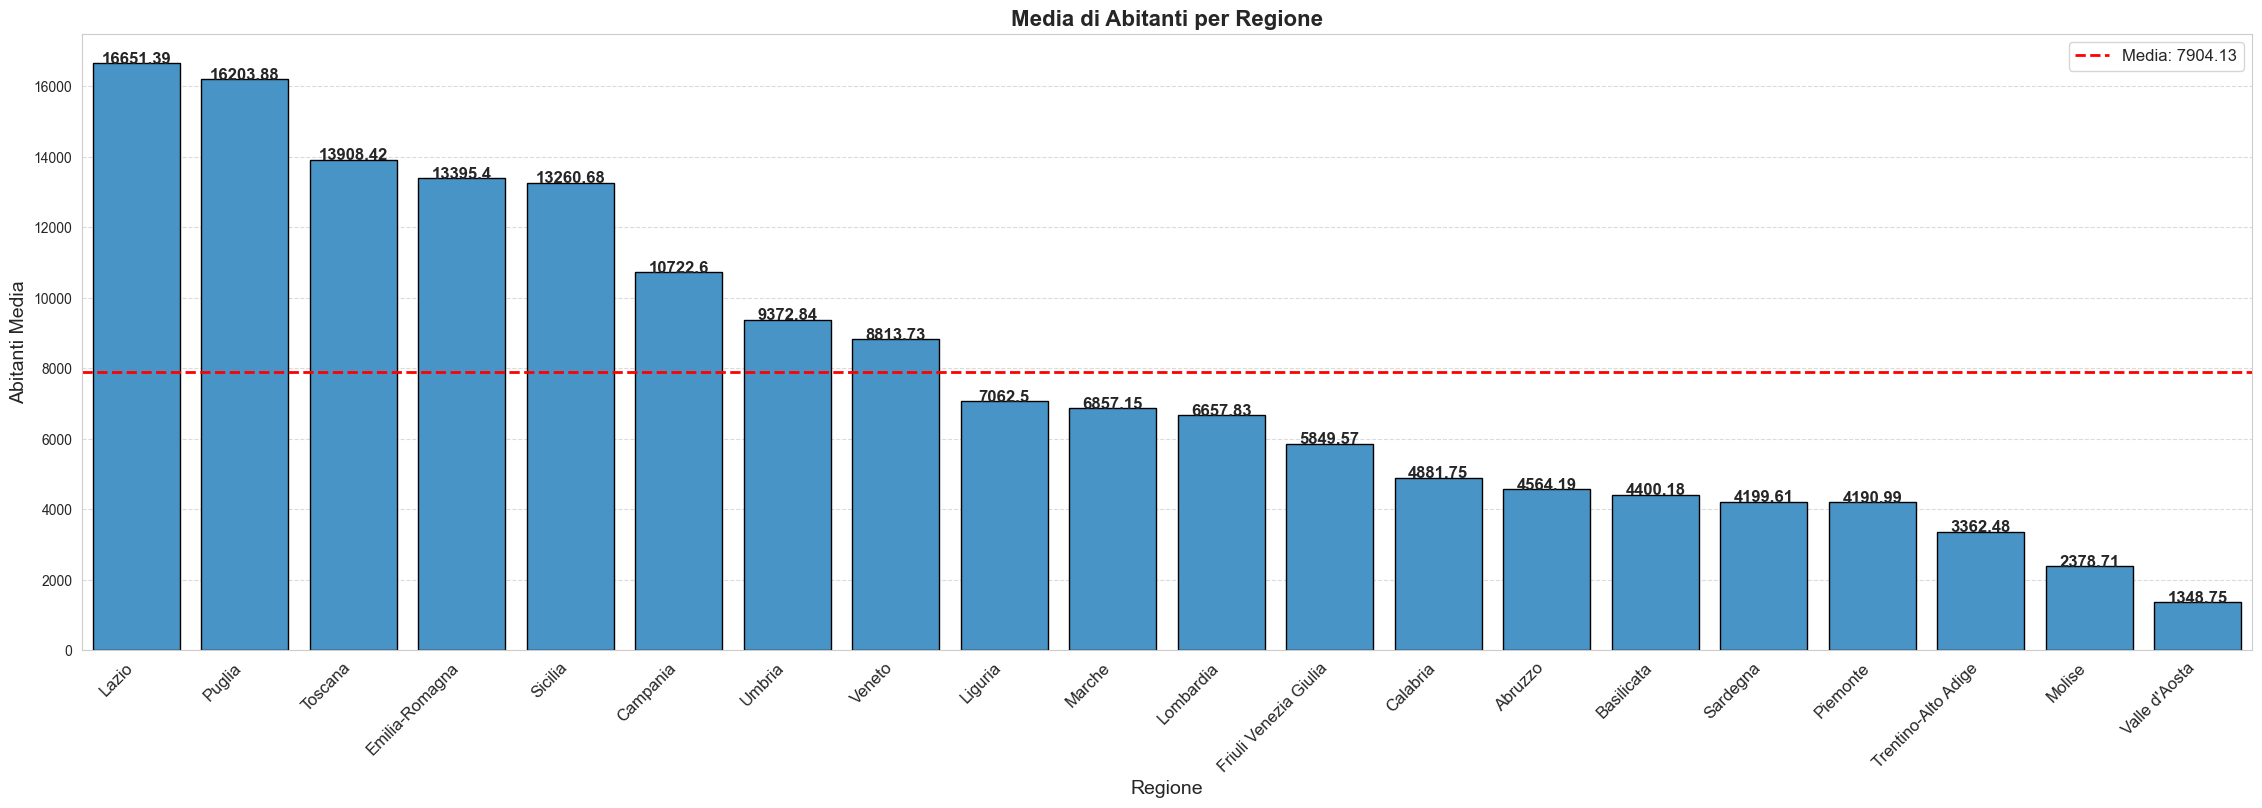

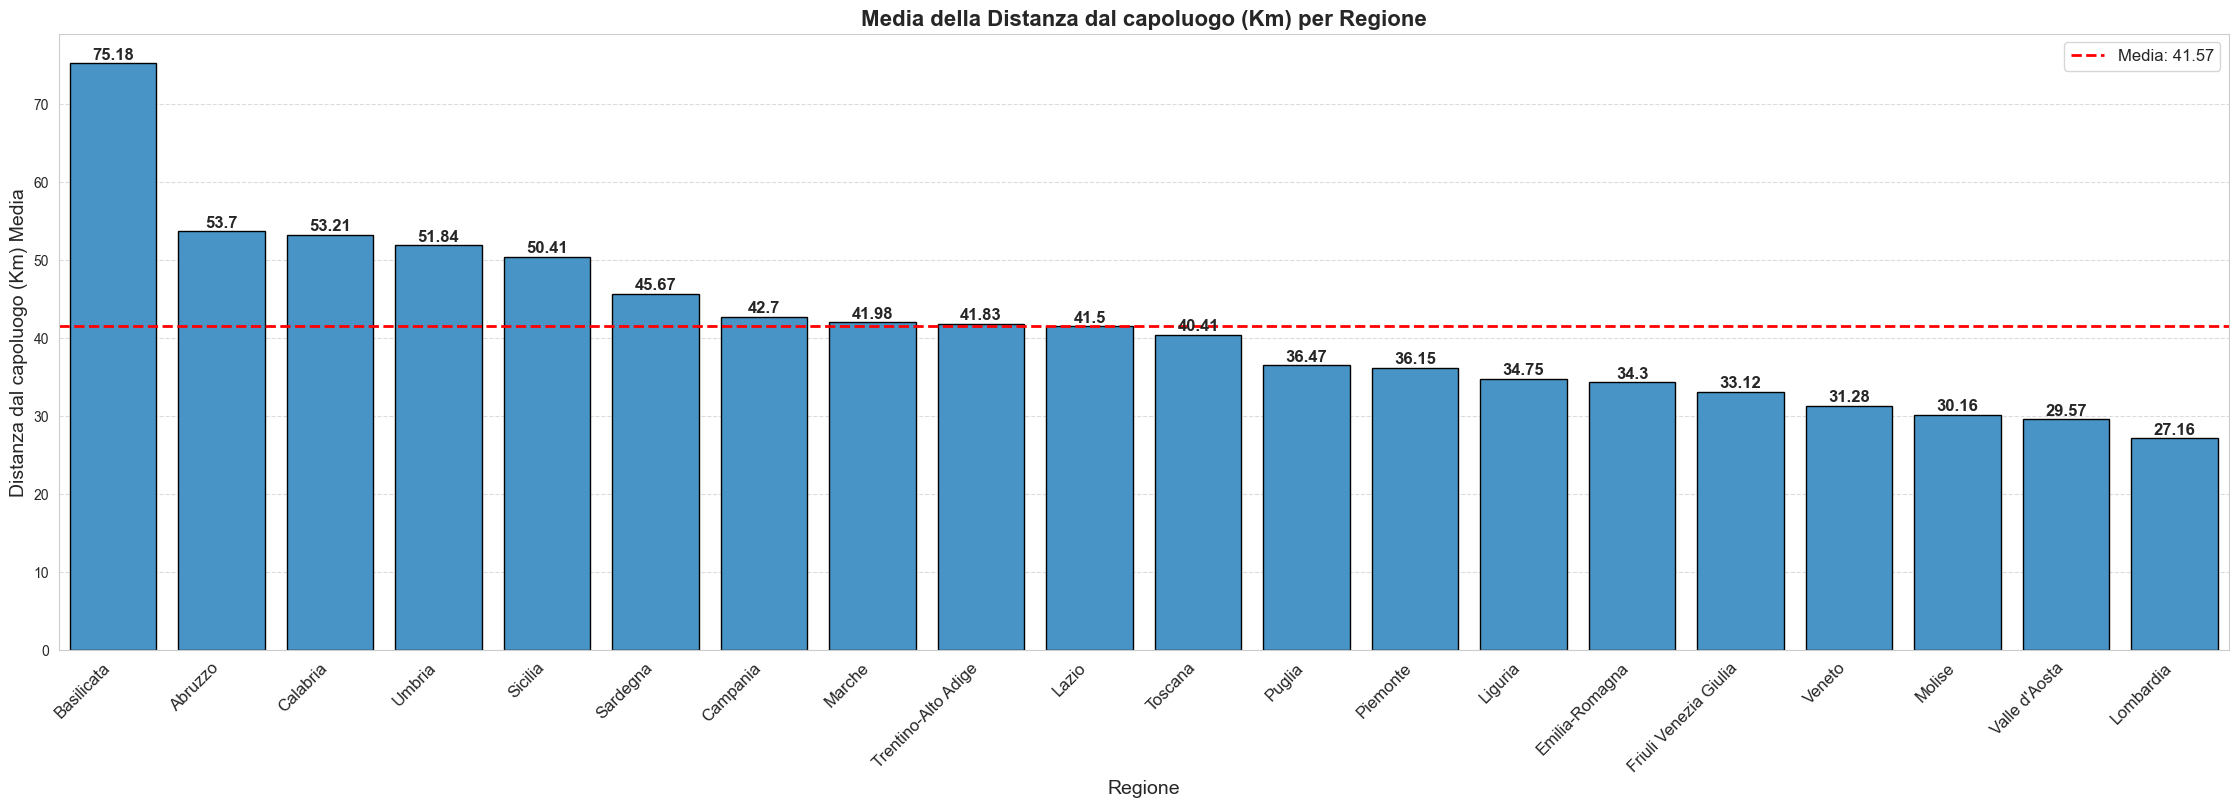

In [88]:
grafico_barre(ds_abitanti_distanza.groupby('Regione')['Abitanti'].mean().round(2).sort_values(ascending=False).reset_index(), 
              'Regione', 'Abitanti', 'Media di Abitanti per Regione', figsize=(28, 8), mostra_media=True)

grafico_barre(ds_abitanti_distanza.groupby('Regione')['Distanza dal capoluogo (Km)'].mean().round(2).sort_values(ascending=False).reset_index(), 
              'Regione', 'Distanza dal capoluogo (Km)', 'Media della Distanza dal capoluogo (Km) per Regione', figsize=(28, 8), mostra_media=True)

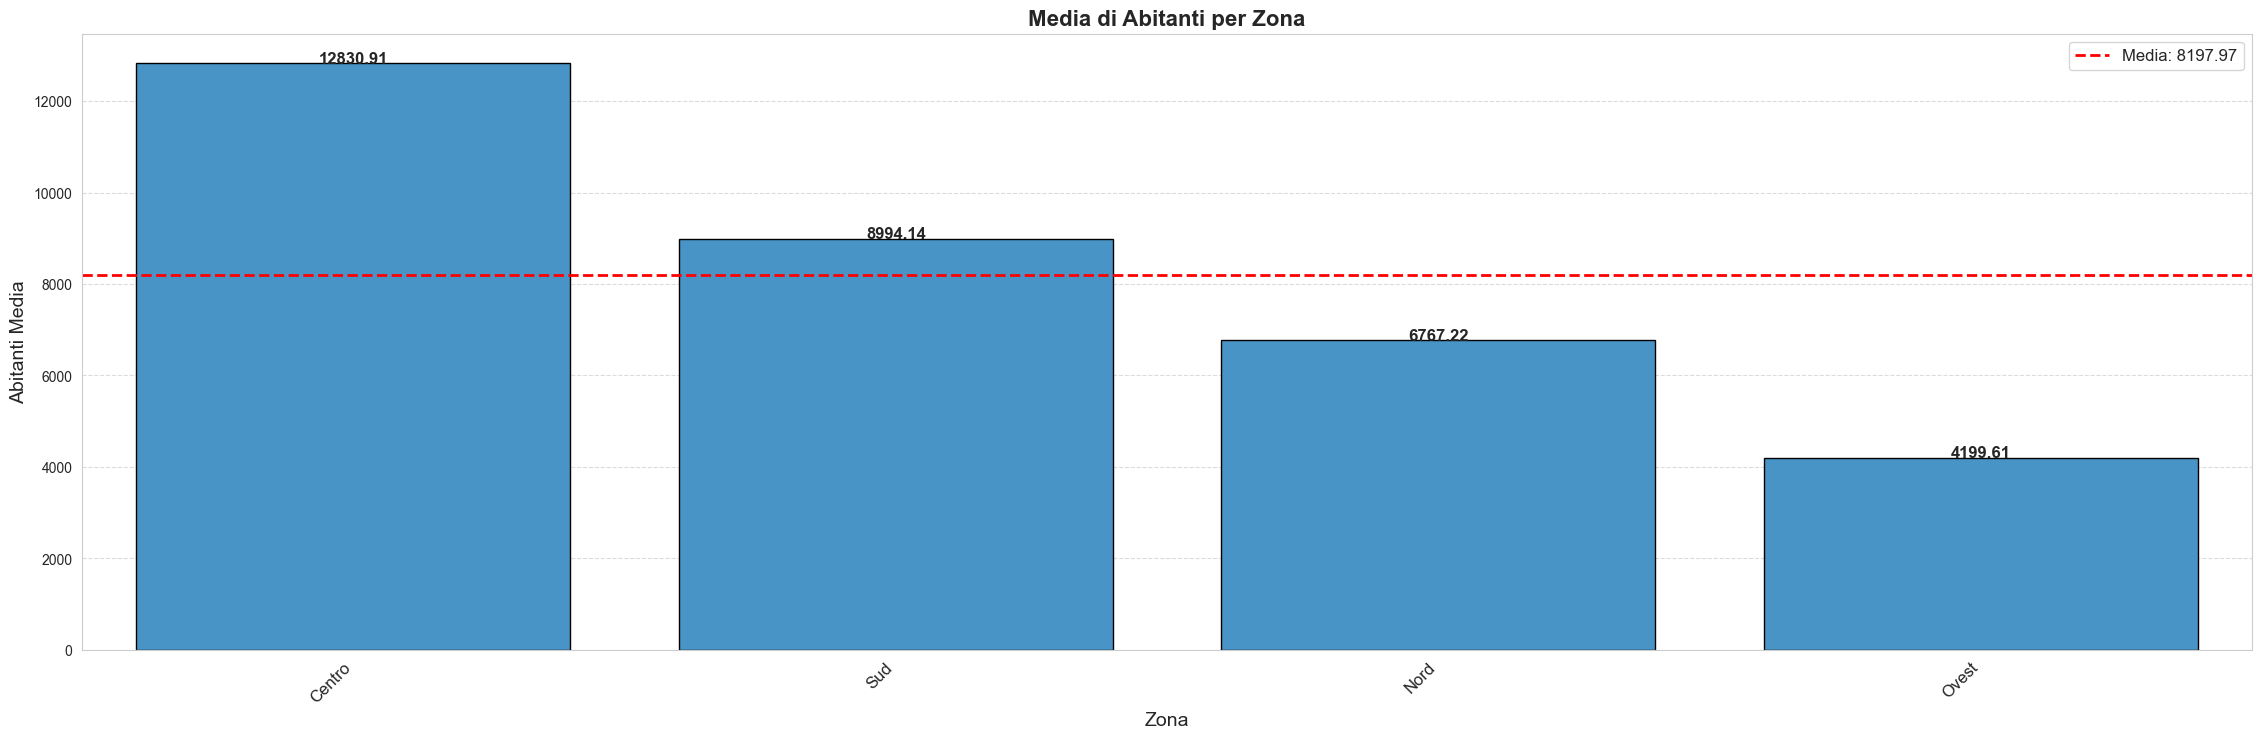

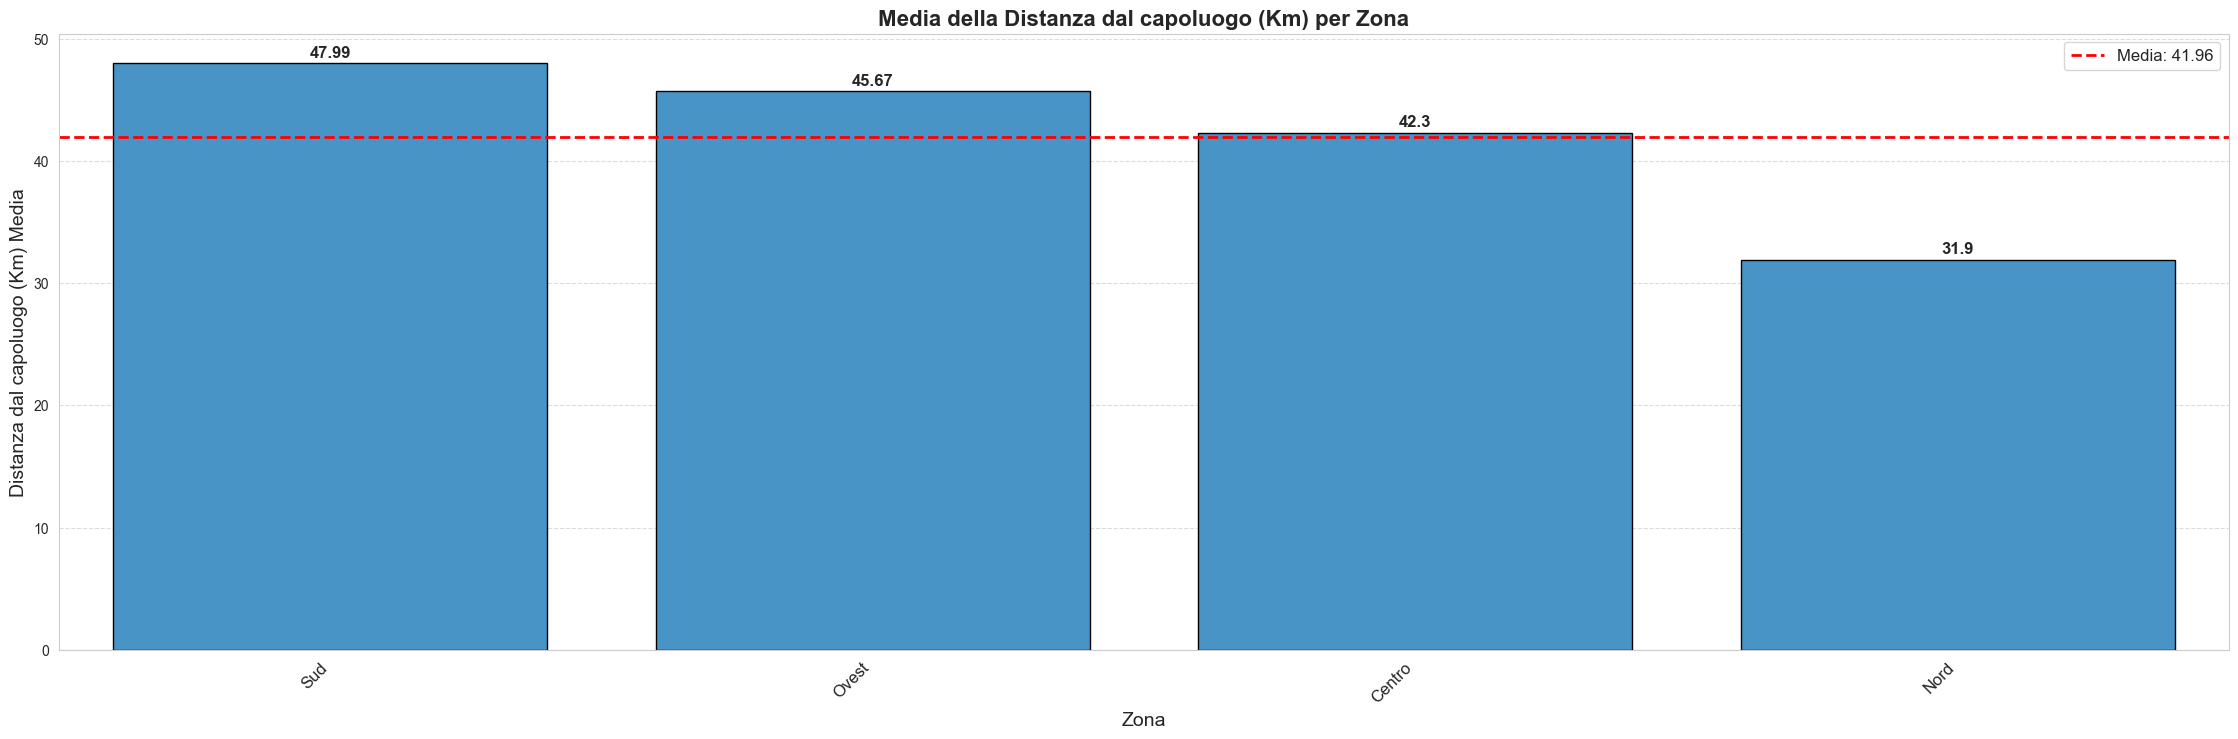

In [89]:
ds_abitanti_distanza = ds_abitanti_distanza[ds_abitanti_distanza['Zona'] != 'Sconosciuto']

grafico_barre(ds_abitanti_distanza.groupby('Zona')['Abitanti'].mean().round(2).sort_values(ascending=False).reset_index(), 
              'Zona', 'Abitanti', 'Media di Abitanti per Zona', figsize=(28, 8), mostra_media=True)

grafico_barre(ds_abitanti_distanza.groupby('Zona')['Distanza dal capoluogo (Km)'].mean().round(2).sort_values(ascending=False).reset_index(), 
              'Zona', 'Distanza dal capoluogo (Km)', 'Media della Distanza dal capoluogo (Km) per Zona', figsize=(28, 8), mostra_media=True)

## Redditi e Imposta Netta

In [90]:
imposta_netta = dfs['redditi_02']
imposta_netta = imposta_netta[imposta_netta['Categoria'] == 'Imposta netta']

imposta_netta = pd.merge(imposta_netta.drop(columns='Categoria'), dfs['comunali'][['Comune', 'Provincia', 'Regione', 'Zona']], on='Comune')
imposta_netta.head()

,Contribuenti,Reddito,Media annuale,Media mensile,Anno precedente,Variazione,Comune,Provincia,Regione,Zona
0,24897,122874972.0,4935.33,411.28,408.15,3.13,Agrigento,Agrigento,Sicilia,Sud
1,53867,282629340.0,5246.80,437.23,428.04,9.19,Alessandria,Alessandria,Piemonte,Nord
2,57466,321477338.0,5594.22,466.18,462.71,3.47,Ancona,Ancona,Marche,Centro
3,21712,119234297.0,5491.63,457.64,455.00,2.64,Aosta,Aosta,Valle d'Aosta,Sconosciuto
4,57479,296975671.0,5166.68,430.56,426.86,3.70,Arezzo,Arezzo,Toscana,Centro


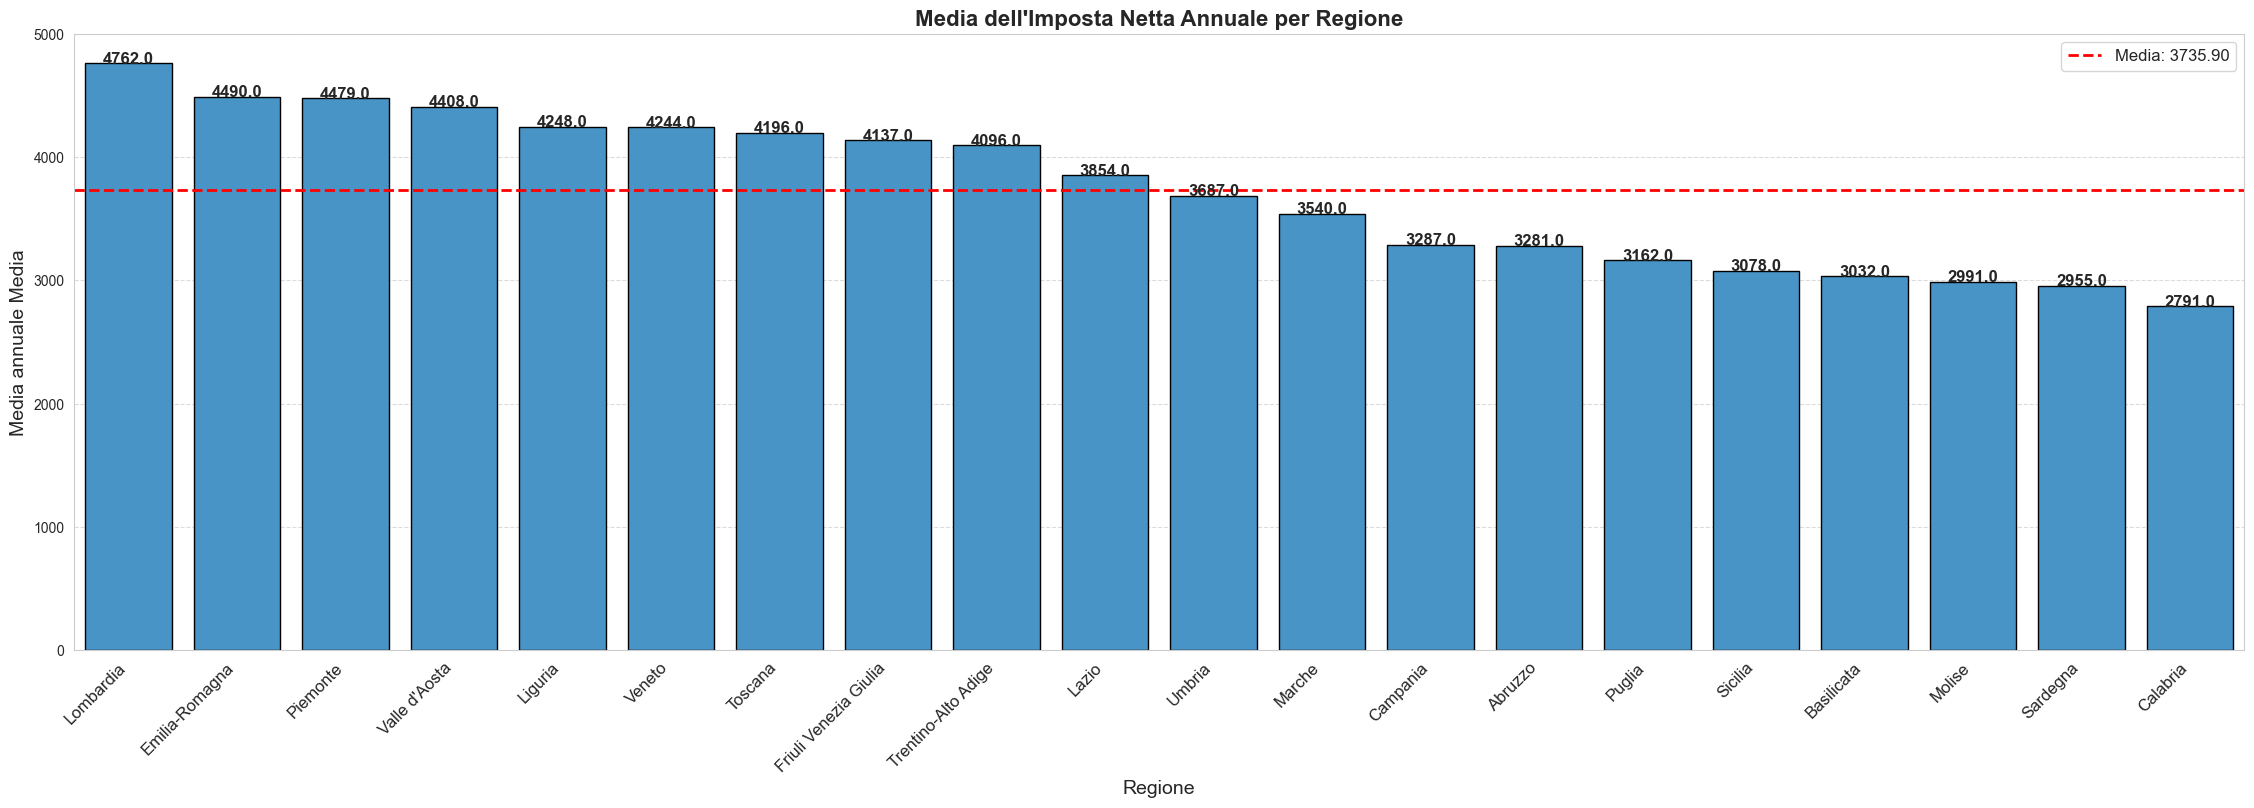

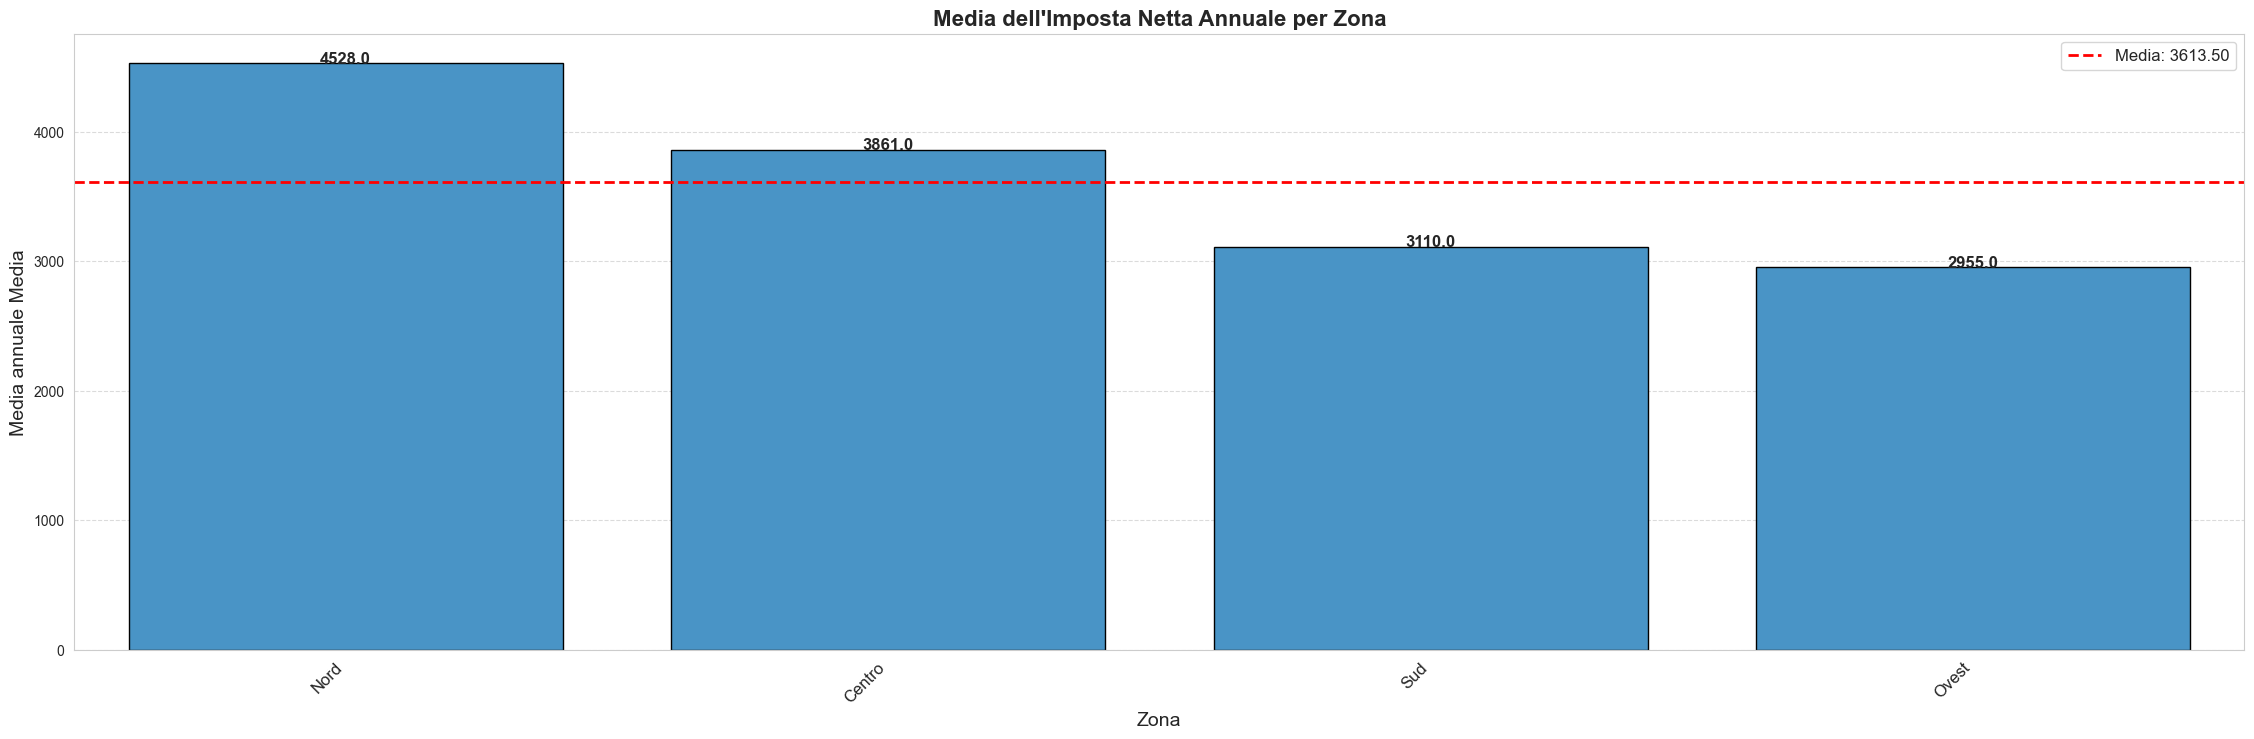

In [91]:
df_plot = imposta_netta.groupby('Regione', as_index=False)['Media annuale'].mean().round().sort_values(by='Media annuale', ascending=False)
grafico_barre(df_plot, 'Regione', 'Media annuale', "Media dell'Imposta Netta Annuale per Regione", figsize=(28, 8), mostra_media=True)

df_plot = imposta_netta[imposta_netta['Zona'] != 'Sconosciuto'].groupby('Zona', as_index=False)['Media annuale'].mean().round().sort_values(by='Media annuale', ascending=False)
grafico_barre(df_plot, 'Zona', 'Media annuale', "Media dell'Imposta Netta Annuale per Zona", figsize=(28, 8), mostra_media=True)

## Parrocchie

In [92]:
parrocchiani = dfs['comunali'][['Comune', 'Provincia', 'Regione', 'Zona', 'Parrocchie', 'Abitanti', 'Parrrocchiani']]
parrocchiani['Percentuale di Parrocchiani'] = round((parrocchiani['Parrrocchiani'] / parrocchiani['Abitanti']) * 100)
parrocchiani['Numero di Fedeli per Parrocchie'] = round(parrocchiani['Parrrocchiani'] / parrocchiani['Parrocchie'])

parrocchiani = parrocchiani[parrocchiani['Percentuale di Parrocchiani'] < 100]
parrocchiani.sort_values(by="Numero di Fedeli per Parrocchie", ascending=False, inplace=True)

C:\Users\schit\AppData\Local\Temp\ipykernel_13624\1392099585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parrocchiani['Percentuale di Parrocchiani'] = round((parrocchiani['Parrrocchiani'] / parrocchiani['Abitanti']) * 100)
C:\Users\schit\AppData\Local\Temp\ipykernel_13624\1392099585.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parrocchiani['Numero di Fedeli per Parrocchie'] = round(parrocchiani['Parrrocchiani'] / parrocchiani['Parrocchie'])


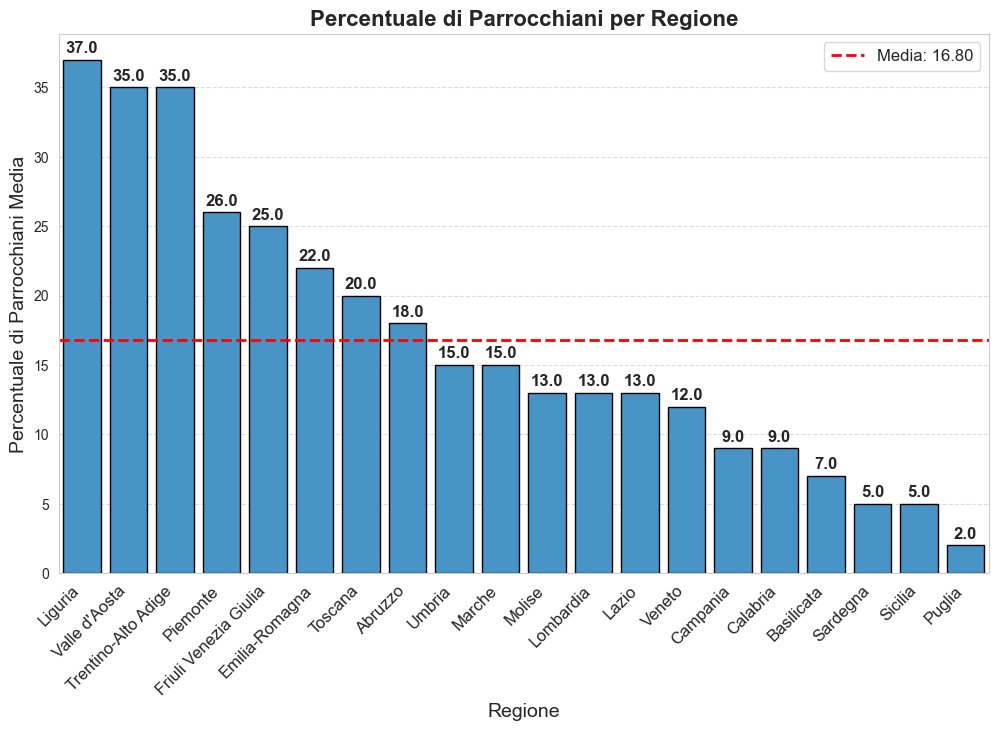

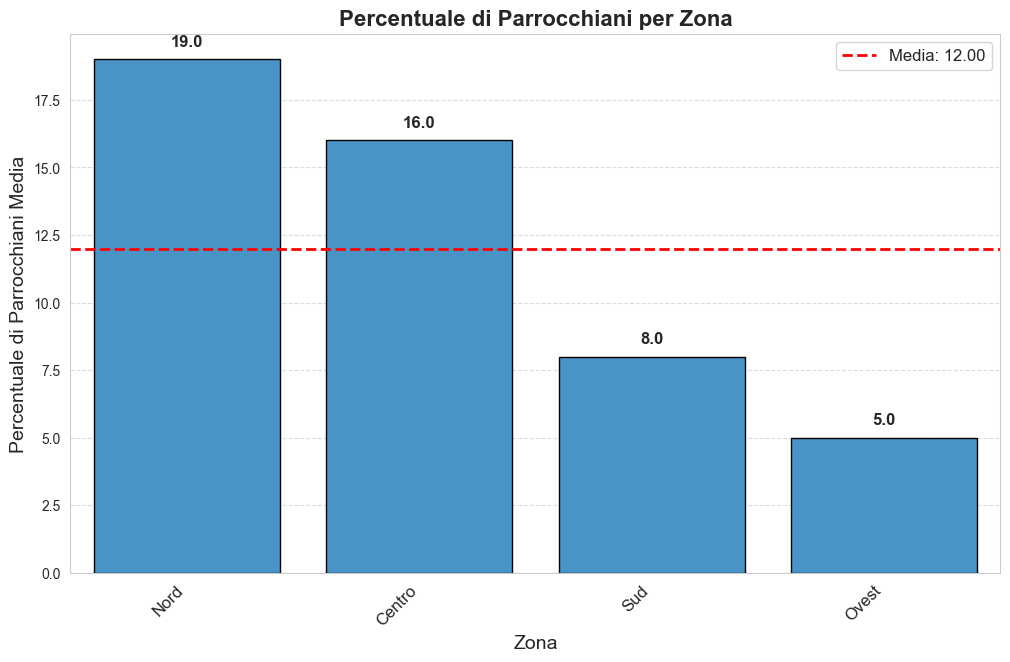

In [93]:
df_fedeli = parrocchiani.groupby('Regione')['Percentuale di Parrocchiani'].mean().round().sort_values(ascending=False)
grafico_barre(pd.DataFrame(df_fedeli), 'Regione', 'Percentuale di Parrocchiani', 'Percentuale di Parrocchiani per Regione', mostra_media=True)

df_fedeli = parrocchiani[parrocchiani['Zona'] != "Sconosciuto"].groupby('Zona')['Percentuale di Parrocchiani'].mean().round().sort_values(ascending=False)
grafico_barre(pd.DataFrame(df_fedeli), 'Zona', 'Percentuale di Parrocchiani', 'Percentuale di Parrocchiani per Zona', mostra_media=True)

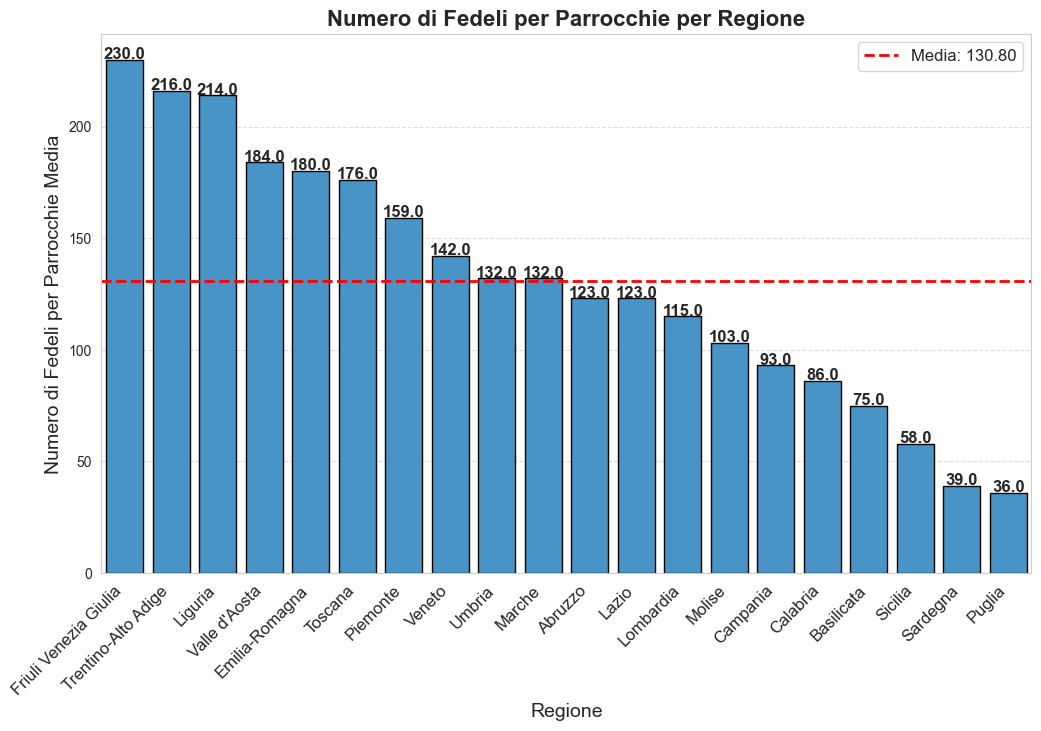

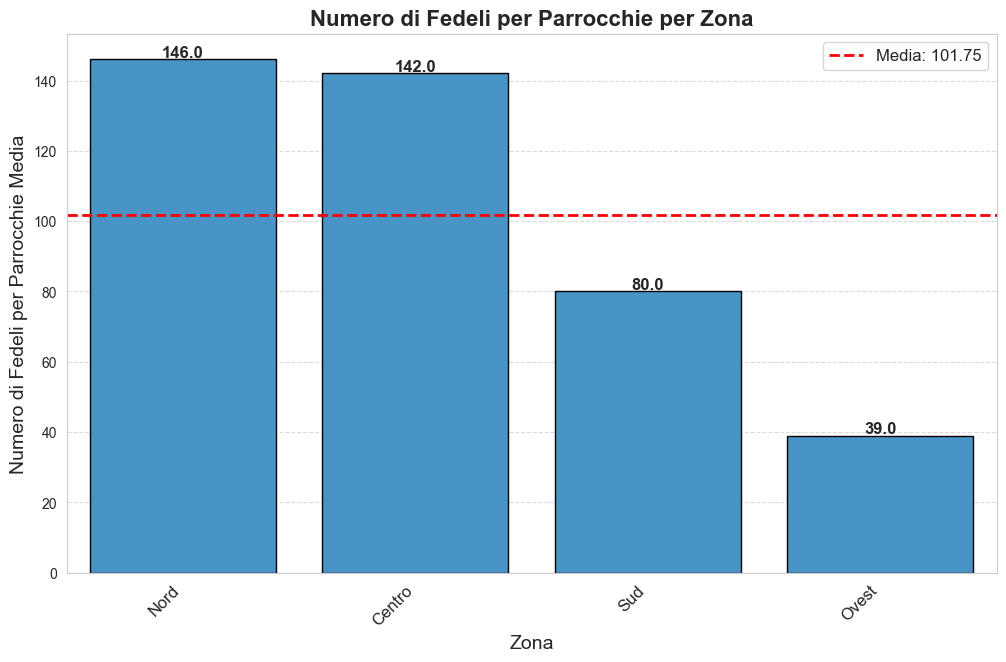

In [94]:
df_fedeli = parrocchiani.groupby('Regione')['Numero di Fedeli per Parrocchie'].mean().round().sort_values(ascending=False)
grafico_barre(pd.DataFrame(df_fedeli), 'Regione', 'Numero di Fedeli per Parrocchie', 'Numero di Fedeli per Parrocchie per Regione', mostra_media=True)

df_fedeli = parrocchiani[parrocchiani['Zona'] != "Sconosciuto"].groupby('Zona')['Numero di Fedeli per Parrocchie'].mean().round().sort_values(ascending=False)
grafico_barre(pd.DataFrame(df_fedeli), 'Zona', 'Numero di Fedeli per Parrocchie', 'Numero di Fedeli per Parrocchie per Zona', mostra_media=True)

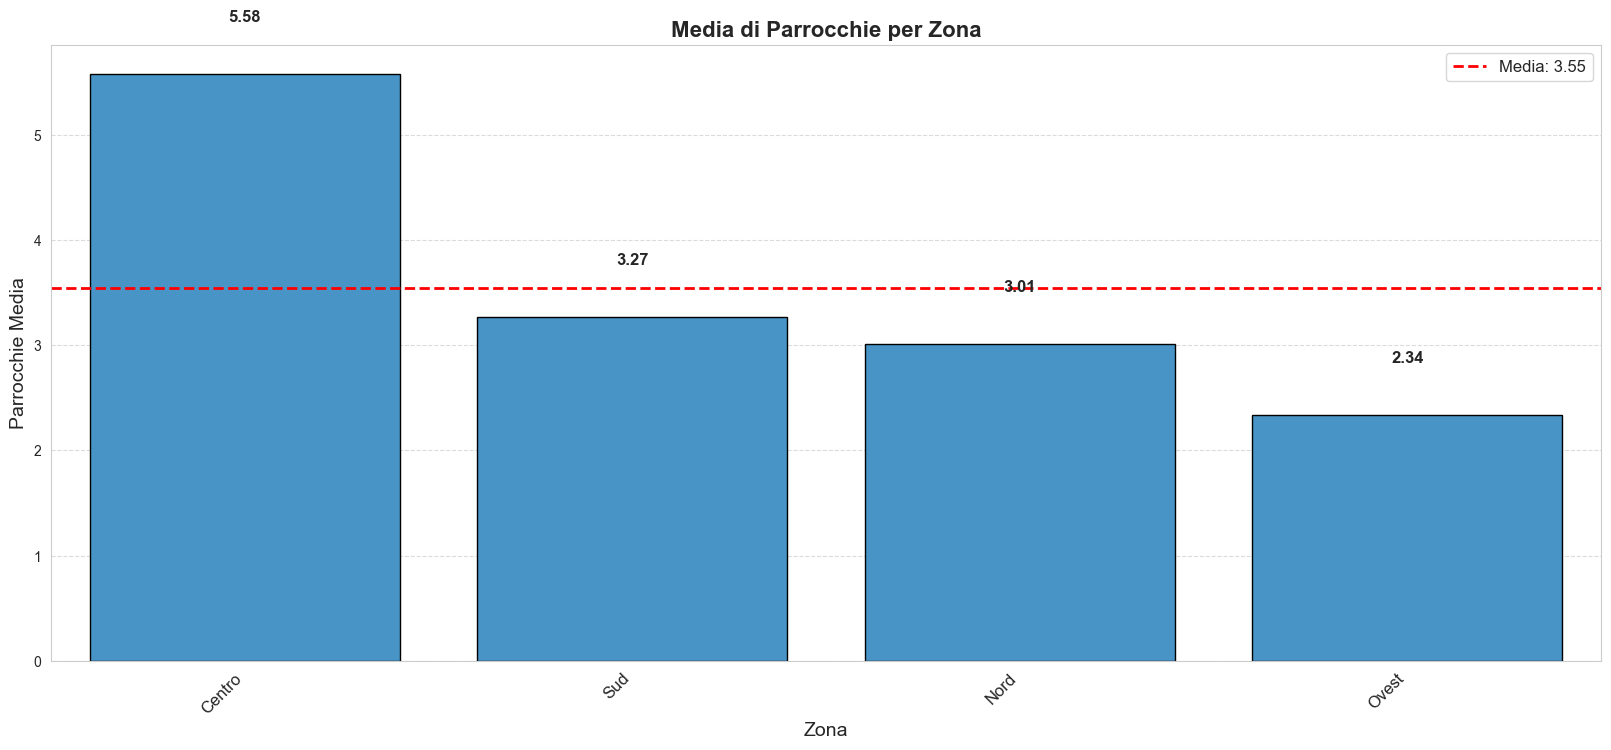

In [95]:
df_plot_parrocchie = dfs['comunali'][['Comune', 'Provincia', 'Regione', 'Zona', 'Parrocchie']]
df_plot_parrocchie = df_plot_parrocchie[df_plot_parrocchie['Zona'] != 'Sconosciuto']

df_plot_parrocchie = (df_plot_parrocchie.groupby('Zona')['Parrocchie'].mean().round(2).sort_values(ascending=False).reset_index())
grafico_barre(df_plot_parrocchie, 'Zona', 'Parrocchie', 'Media di Parrocchie per Zona', figsize=(20, 8), mostra_media=True)

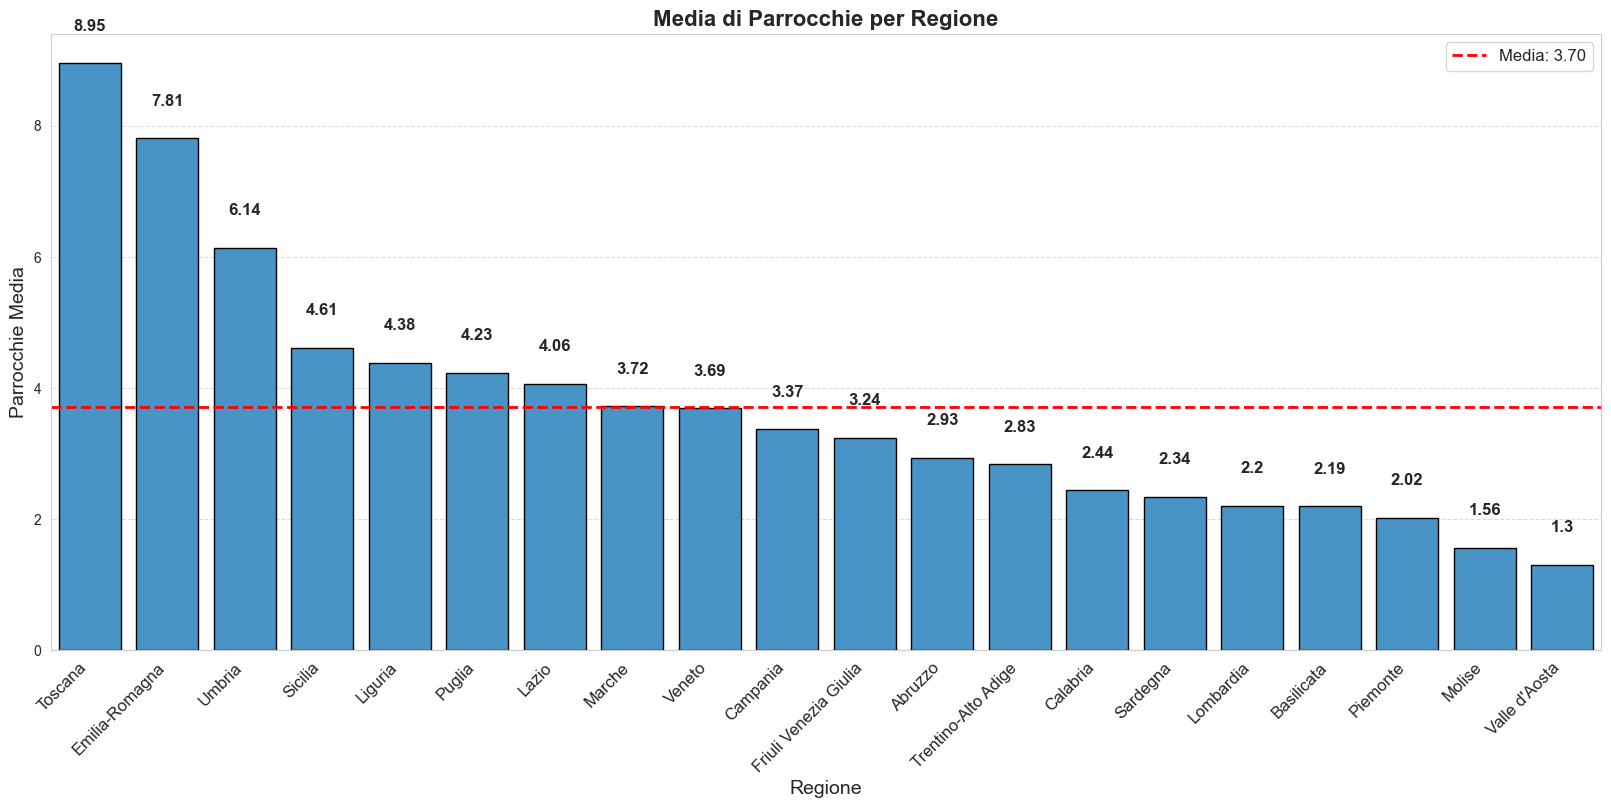

In [96]:
df_plot_parrocchie = (dfs['comunali'][['Comune', 'Provincia', 'Regione', 'Zona', 'Parrocchie']]
                        .groupby('Regione')['Parrocchie'].mean().round(2).sort_values(ascending=False).reset_index())

grafico_barre(df_plot_parrocchie, 'Regione', 'Parrocchie', 'Media di Parrocchie per Regione', figsize=(20, 8), mostra_media=True)